In [2]:
import numpy as np #科学计算库
import pandas as pd #数据分析，二位数表
import matplotlib.pyplot as plt #绘图框架


In [3]:
data = pd.read_csv('ex1data1.txt',names = ['population','profit'])
#读文件pandas.read_csv()，names:列表，指定列名
data.head() #列表前5行


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.tail() #列表后5行

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [5]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
data.info() #列表信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


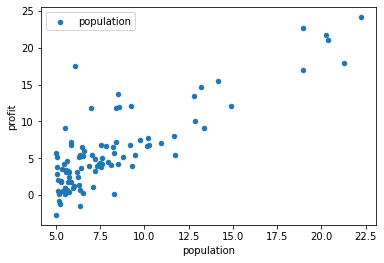

In [7]:
data.plot.scatter('population','profit',
                  label='population')
#散点图data.plot.scatter('横坐标'，'纵坐标'，label='标签')
plt.show()

In [8]:
data.insert(0,'ones',1) #插入data.insert(列索引，标签，数值)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [9]:
X = data.iloc[:,0:2] #切片data.iloc[行数，起始列数：终止列数]
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y = data.iloc[:,-1]
y.head() #此时是Dataframe结构，而不是数组结构

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [11]:
X = X.values
#dataframe转变为ndarray结构方式
#1.df.values
#2.df.as_matrix()
#3.np.array(df)

In [12]:
X.shape#查看维度，行*列

(97, 2)

In [13]:
y = y.values

In [14]:
y.shape #此时数组为一维

(97,)

In [15]:
y = y.reshape(97,1)
y.shape

(97, 1)

In [16]:
def costFunction(X,y,theta): #定义损失函数
    inner = np.power( X @ theta - y,2)#inner为内部运算结果，np.power( , )是次方的函数
    return np.sum(inner) / (2*len(X)) #return使inner返回数值

In [17]:
theta = np.zeros((2,1))#对theta进行初始化，初始化为0.使X@theta与y的维度相同
theta.shape

(2, 1)

In [18]:
cost_init = costFunction(X,y,theta)#查看此时损失函数的数值
print(cost_init)

32.072733877455676


In [19]:
def gradientDescent(X,y,theta,alpha,iters): #定义梯度下降函数，iters为迭代的次数
    costs = [] #把期间所有迭代产生的数值进行获取
    
    for i in range(iters):
        theta = theta-(X.T @ (X@theta- y))*alpha / len(X)
        cost = costFunction(X,y,theta) #获取当前的损失函数
        costs.append(cost) #列表增加元素
        
        if i % 100 == 0: #只打印100的整数倍，才会打印cost
            print(cost)
            
    return theta,costs
        

In [20]:
alpha = 0.02 #学习速率
iters = 2000 #迭代次数

theta,costs = gradientDescent(X,y,theta,alpha,iters)

16.76964237166745
5.170668092303259
4.813840215803055
4.640559602034057
4.556412109403549
4.5155489085988645
4.495705166048674
4.486068766778817
4.481389196347322
4.479116731414093
4.478013190619409
4.477477295755764
4.477217057705424
4.477090682463859
4.477029312876824
4.476999510945953
4.476985038710984
4.476978010791016
4.476974597934662
4.476972940603823


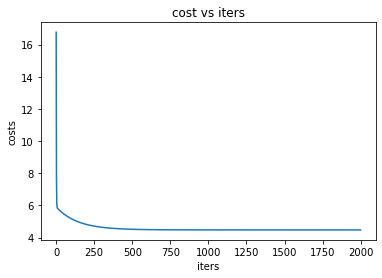

In [21]:
fig,ax = plt.subplots() #生成fig(图像)，ax(实例)
ax.plot(np.arange(iters),costs)
#曲线:plot，由于costs为列表形式，所以把iters转换为列表形式：np.arange()
ax.set(xlabel='iters',
      ylabel='costs',
      title='cost vs iters') #设置
plt.show()

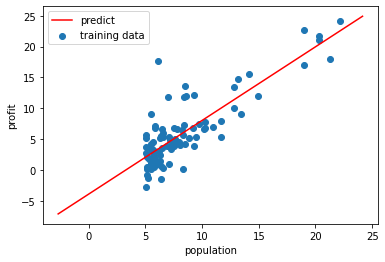

In [22]:
x = np.linspace(y.min(),y.max(),100) #np.linspace指定x的min,max来生成点数量
y_ = theta[0,0] + theta[1,0]* x #拟合出的直线函数

fig,ax = plt.subplots()
ax.scatter(X[:,1],y,label='training data') #散点图
ax.plot(x,y_,'r',label='predict')
ax.legend() #显示标签图标
ax.set(xlabel='population',
      ylabel='profit')
plt.show()

In [23]:
theta

array([[-3.8928815 ],
       [ 1.19274237]])